## **1. Prepare the data**

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
#from plotcm import plot_confusion_matrix

import pdb

torch.set_printoptions(linewidth=120)

In [6]:
# we do not have to do it when using fashion mnist dataset, as it implements it in background
class OHLC(torch.utils.data.Dataset):
  def __init__(self, csv_file):
    self.data = pd.read_csv(csv_file)

  def __getitem__(self, index):
    r = self.data.iloc[index]
    label = torch.tensor(r.is_up_day, dtype=torch.long)
    sample = self.normalize(torch.tensor([r.open, r.high, r.low, r.close]))
    return sample, label

  def __len__(self):
    return len(self.data)

In [7]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST',
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

In [8]:
# train_loader = torch.utils.data.DataLoader(train_set)
train_loader = torch.utils.data.DataLoader(train_set
    ,batch_size=1000
    ,shuffle=True
)

From an ETL perspective, we have achieved the extract, and the transform using torchvision when we created the dataset:

1. Extract – The raw data was extracted from the web.
2. Transform – The raw image data was transformed into a tensor.
3. Load – The train_set wrapped by (loaded into) the data loader giving us access to the underlying data.

## **Exploring The Data**

In [9]:
len(train_set)

60000

In [10]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [11]:
train_set.targets.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

## **Class Imbalance: Balanced And Unbalanced Datasets**

This shows us that the Fashion-MNIST dataset is uniform with respect to the number of samples in each class. This means we have 6000 samples for each class. As a result, this dataset is said to be balanced. If the classes had a varying number of samples, we would call the set an unbalanced dataset.

Class imbalance is a common problem, but in our case, we have just seen that the Fashion-MNIST dataset is indeed balanced, so we need not worry about that for our project.

## **Accessing Data In The Training Set**

In [12]:
sample = next(iter(train_set))
len(sample)

2

In [13]:
image, label = sample

In [14]:
type(image)

torch.Tensor

In [15]:
type(label)

int

In [16]:
image.shape

torch.Size([1, 28, 28])

In [17]:
torch.tensor(label).shape

torch.Size([])

In [18]:
image.squeeze().shape

torch.Size([28, 28])

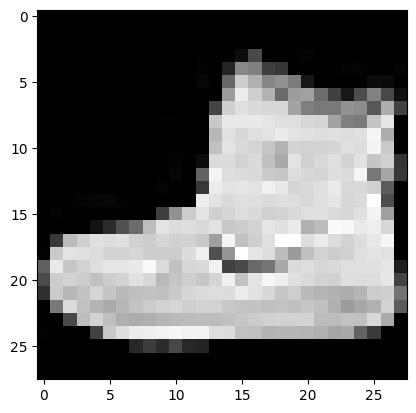

In [19]:
plt.imshow(image.squeeze(), cmap="gray")

In [20]:
torch.tensor(label)

tensor(9)

## **PyTorch DataLoader: Working With Batches Of Data**

In [21]:
display_loader = torch.utils.data.DataLoader(
    train_set, batch_size=10
)

In [23]:
batch = next(iter(display_loader))
print('len:', len(batch))

len: 2


In [24]:
images, labels = batch

In [25]:
print('types:', type(images), type(labels))
print('shapes:', images.shape, labels.shape)

types: <class 'torch.Tensor'> <class 'torch.Tensor'>
shapes: torch.Size([10, 1, 28, 28]) torch.Size([10])


In [26]:
images[0].shape

torch.Size([1, 28, 28])

In [27]:
labels[0]

tensor(9)

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


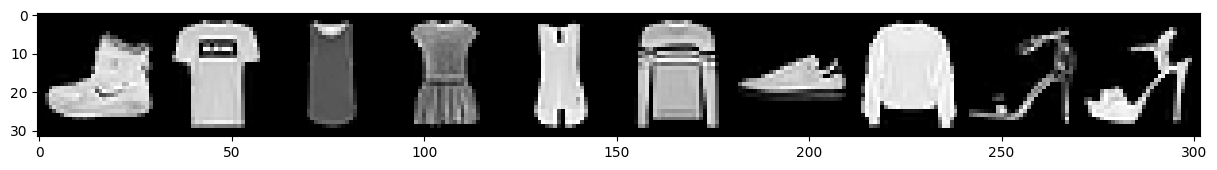

In [28]:
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

print('labels:', labels)

permute() PyTorch tensor method can be used in place of np.transpose()

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


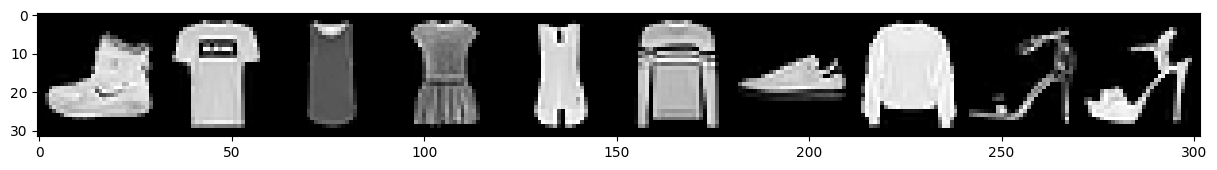

In [29]:
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(grid.permute(1,2,0))

print('labels:', labels)

## **How To Plot Images Using PyTorch DataLoader**

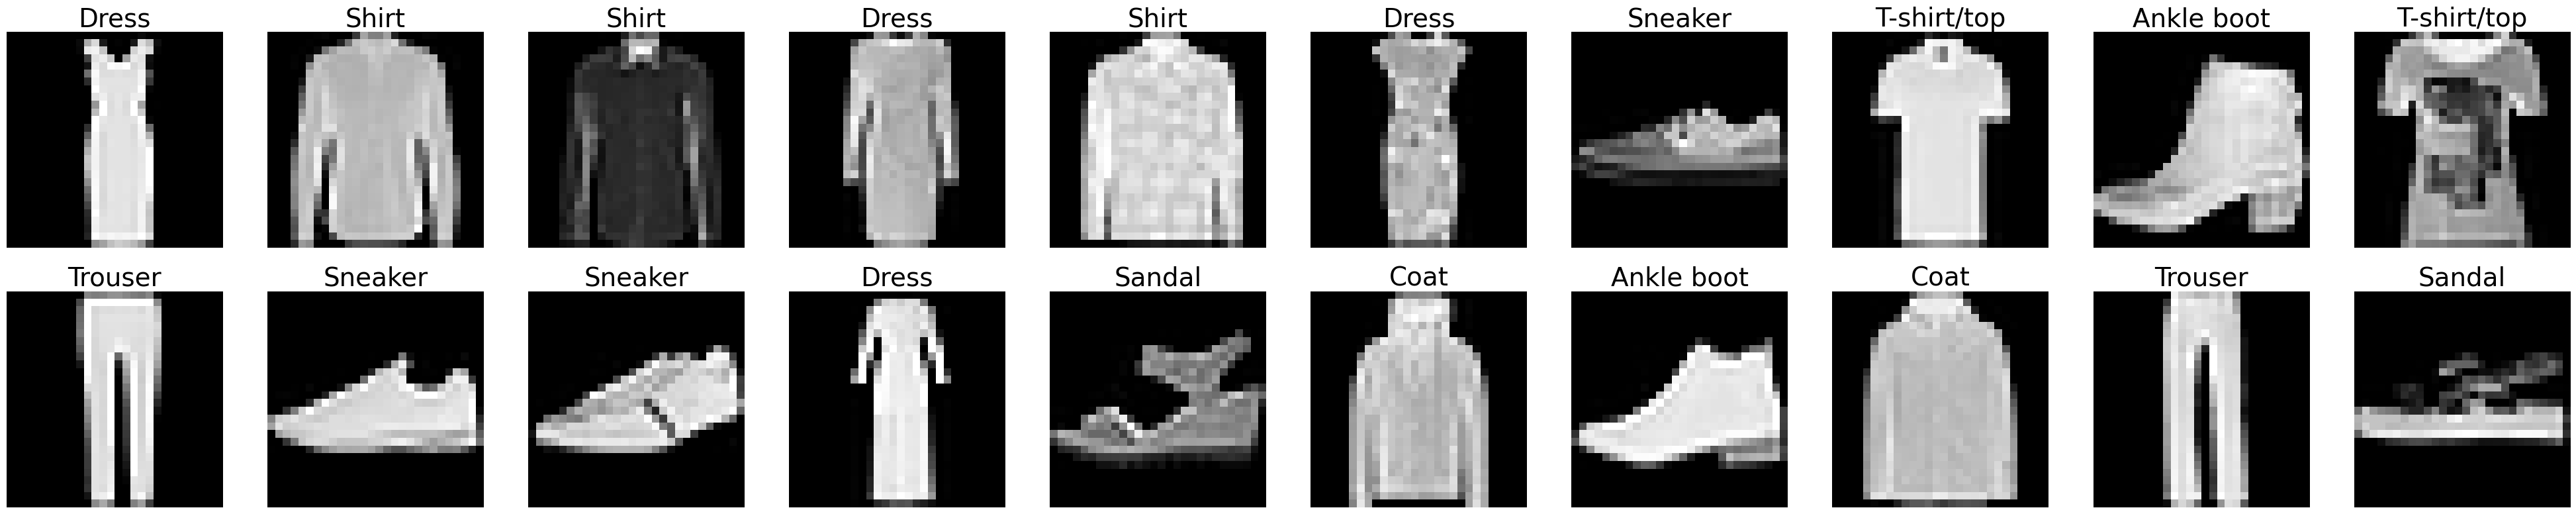

In [33]:
how_many_to_plot = 20

train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=1, shuffle=True
)

plt.figure(figsize=(50,50))
for i, batch in enumerate(train_loader, start=1):
    image, label = batch
    plt.subplot(10,10,i)
    plt.imshow(image.reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title(train_set.classes[label.item()], fontsize=28)
    if (i >= how_many_to_plot): break
plt.show()